# Mohamed Hozien, 202201507

# Imports

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Plot Pitch For a Chicken Record (0.25)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Hozien\AppData\Local\Temp\ipykernel_24400\2670024613.py:1: SyntaxWarning: invalid escape sequence '\d'
  y, sr = librosa.load('data\data\Chicken\Chicken_1.wav', sr=None)


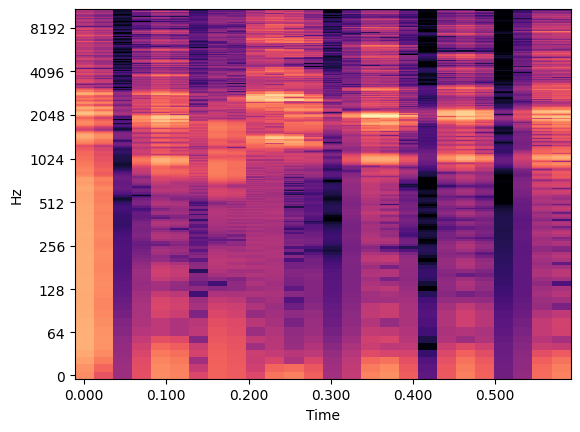

In [2]:
y, sr = librosa.load('data\data\Chicken\Chicken_1.wav', sr=None)
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')

ignore this cell

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Hozien\AppData\Local\Temp\ipykernel_24400\2368670637.py:1: SyntaxWarning: invalid escape sequence '\d'
  y, sr = librosa.load('data\data\Chicken\Chicken_1.wav', sr=None)


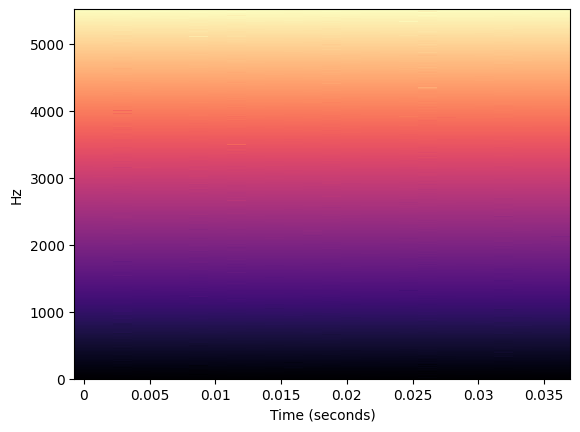

In [3]:
y, sr = librosa.load('data\data\Chicken\Chicken_1.wav', sr=None)

freqs, times, mags = librosa.reassigned_spectrogram(y, sr=sr,
                                                    fill_nan=True)
img = librosa.display.specshow(freqs, x_axis="s", y_axis="linear", sr=sr,
                               hop_length=64//4)

# Plot Pitch For a Dog Record (0.25)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Hozien\AppData\Local\Temp\ipykernel_24400\421493047.py:1: SyntaxWarning: invalid escape sequence '\d'
  y, sr = librosa.load('data\data\Dog\Dog_1.wav', sr=None)


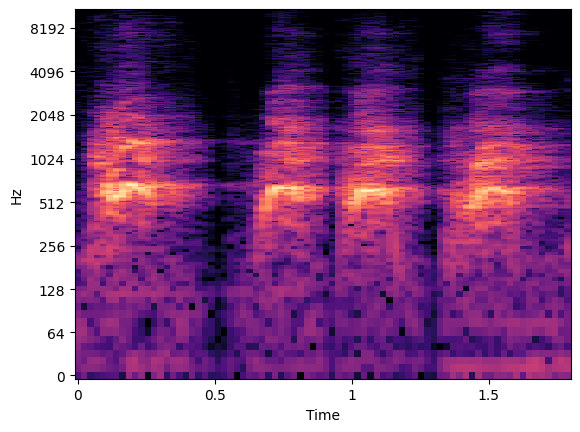

In [4]:
y, sr = librosa.load('data\data\Dog\Dog_1.wav', sr=None)
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')

# Load Data (0.5)

In [5]:
def extract_mfcc(file_path, n_mfcc=20):
    """
    Extracts MFCC features from an audio file and averages them over time.

    Args:
        file_path (str): Path to the audio file.
        n_mfcc (int): Number of MFCC coefficients to extract (default=20).

    Returns:
        np.ndarray: A 1D array containing the averaged MFCC features.
    """
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc)

In [6]:
def load_dataset(base_dir):
    """
    Loads all audio files from subfolders inside the dataset directory,
    extracts MFCC features, and assigns numerical labels to each class.

    Args:
        base_dir (str): Path to the dataset folder containing class subfolders.

    Returns:
        tuple: Features (X) as a NumPy array and labels (y) as a NumPy array.
    """
    X, y = [], []
    classes = os.listdir(base_dir)
    for label_idx, cls in enumerate(classes):
        cls_path = os.path.join(cls)
        for fname in os.listdir(f'{base_dir}/{cls_path}'):
            if fname.endswith(".wav"):
                path = os.path.join(f'{base_dir}/{cls_path}/{fname}')
                features = extract_mfcc(path)
                X.append(features)
                y.append(label_idx)
    return np.array(X), np.array(y), classes

# Train (3)


In [7]:
def split_dataset(X, y, test_size=0.3, random_state=42):
    """
    Splits the dataset into training and testing sets.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Label array.
        test_size (float): Proportion of the dataset used for testing (default=0.3).
        random_state (int): Random seed for reproducibility (default=42).

    Returns:
        tuple: X_train, X_test, y_train, y_test arrays.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [ ]:
def train_gmms(X_train, y_train):
    """
    Trains a Gaussian Mixture Model (GMM) for each class using the training data.

    Args:
        X_train (np.ndarray): Training feature matrix.
        y_train (np.ndarray): Training label array.

    Returns:
        list: A list of trained GMM models (one per class).
    """
    gmms = []
    for cls in np.unique(y_train):
        gmm = GaussianMixture(n_components=2)
        gmm.fit(X_train)
        gmms.append(gmm)
    return gmms

# Evaluation (1)

In [76]:
def predict_gmms(gmms, X_test):
    """
    Predicts class labels for test samples based on the highest GMM likelihood.

    Args:
        gmms (list): List of trained GMM models.
        X_test (np.ndarray): Test feature matrix.

    Returns:
        list: Predicted class labels.
    """
    y_pred_final = []
    y_pred = []
    for sample in X_test:
        sample = np.reshape(sample, (1,1))
        scores = [gmm.predict(sample) for gmm in gmms]
        y_pred.append(scores)
    return y_pred

In [1]:
def evaluate_model(y_test, y_pred, classes):
    """
    Prints the classification report and confusion matrix for model evaluation.

    Args:
        y_test (np.ndarray): True labels.
        y_pred (np.ndarray): Predicted labels.
        classes (list): Class names corresponding to label indices.
    """
    print("Classes:", classes)
    # print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Run

In [62]:
base_dir = 'data/data/'

In [63]:
# Load dataset and extract features
X, y, classes = load_dataset(base_dir)
X = np.reshape(X, (100, 1))

# Split into train and test
X_train, X_test, y_train, y_test = split_dataset(X, y)

In [64]:
print(X_test.shape)

(30, 1)


In [65]:
# Train GMM models for each class
gmms = train_gmms(X_train, y_train)

In [ ]:
# Predict test data
y_pred = predict_gmms(gmms, X_test) # since the y_pred returns for each sample the prediction as an object, classification report can't deal with unknown numbers in ths case, each index is a numpy object
y_pred

[[array([0], dtype=int64), array([1], dtype=int64)],
 [array([1], dtype=int64), array([0], dtype=int64)],
 [array([1], dtype=int64), array([0], dtype=int64)],
 [array([0], dtype=int64), array([1], dtype=int64)],
 [array([0], dtype=int64), array([1], dtype=int64)],
 [array([0], dtype=int64), array([1], dtype=int64)],
 [array([0], dtype=int64), array([1], dtype=int64)],
 [array([1], dtype=int64), array([0], dtype=int64)],
 [array([1], dtype=int64), array([0], dtype=int64)],
 [array([0], dtype=int64), array([1], dtype=int64)],
 [array([0], dtype=int64), array([1], dtype=int64)],
 [array([0], dtype=int64), array([1], dtype=int64)],
 [array([1], dtype=int64), array([0], dtype=int64)],
 [array([0], dtype=int64), array([1], dtype=int64)],
 [array([1], dtype=int64), array([0], dtype=int64)],
 [array([0], dtype=int64), array([1], dtype=int64)],
 [array([1], dtype=int64), array([0], dtype=int64)],
 [array([1], dtype=int64), array([0], dtype=int64)],
 [array([0], dtype=int64), array([1], dtype=in

In [ ]:
y_pred_dd = [gmm.predict(X_test) for gmm in gmms] # so i predicted on all the x_test instead of calling the prediction function myself
y_pred_dd

[array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0], dtype=int64),
 array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)]

In [91]:
# Evaluate results
evaluate_model(y_test, y_pred_dd[0], classes)
evaluate_model(y_test, y_pred_dd[1], classes)

Classes: ['Chicken', 'Dog']
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       0.89      0.62      0.73        13

    accuracy                           0.80        30
   macro avg       0.83      0.78      0.78        30
weighted avg       0.82      0.80      0.79        30

Confusion Matrix:
 [[16  1]
 [ 5  8]]
Classes: ['Chicken', 'Dog']
              precision    recall  f1-score   support

           0       0.11      0.06      0.08        17
           1       0.24      0.38      0.29        13

    accuracy                           0.20        30
   macro avg       0.17      0.22      0.19        30
weighted avg       0.17      0.20      0.17        30

Confusion Matrix:
 [[ 1 16]
 [ 8  5]]
